<b><div style="text-align:right">Алексей Бебчик&nbsp;&nbsp;</div><b>
### Курс 6. Желтое такси. Неделя 4. Прогнозирование ряда со сложной сезонностью  
(задание, оцениваемое сокурсниками)




<a href="https://www.coursera.org/learn/data-analysis-project/peer/zp6d0/proghnozirovaniie-bol-shogho-kolichiestva-riadov">Задание</a>


Процесс подбора модели ARIMA в Питоне достаточно трудоёмок, поэтому вы не сможете вручную подобрать модель для каждого из рядов в выбранных ячейках. Чтобы облегчить ручной перебор, вам предстоит кластеризовать временные ряды и подобрать гиперпараметры модели ARIMA только один раз для всех рядов каждого кластера. 

Результатом этой недели будут построенные с помощью ARIMA почасовые прогнозы количества поездок для всех географических зон Нью-Йорка. Модель, которую мы строим, должна делать почасовые прогнозы для всех выбранных непустых ячеек на 6 часов вперёд. Качество модели мы будем оценивать с помощью среднего абсолютного отклонения от истинного количества поездок в июне:  

$Q_{june} = \frac1{R* 715 * 6} \sum\limits_{r=1}^{R}  \sum_{T=2016.05.31\,23:00}^{2016.06.30\,17:00}  \sum_{i=1}^6 \left| \hat{y}_{T|T+i}^r - y_{T+i}^r \right|.$

$R$ — количество прогнозируемых рядов, 715 — количество перебираемых концов истории.

Построенные прогнозы вам предстоит загрузить на kaggle. К сожалению, в формате kaggle сложно организовать конкурс по прогнозированию временных рядов в традиционном виде, с отложенным тестом и пересчётом лидерборда, поскольку прогнозы необходимо строить со скользящим концом истории. Но цель использования kaggle в этом проекте — не победа в конкурсе; вы всегда можете загрузить истинные данные за июнь и получить первое место. Цель в том, чтобы посмотреть, какие модели, решения и признаки использовали ваши коллеги, и понять, какие из них стоит попробовать и вам.

Чтобы сдать задание, выполните следующую последовательность действий.  

1.Составьте из данных о поездках прямоугольную таблицу так, чтобы по строкам было время, а по столбцам идентификатор ячейки (возьмите только те, которые были отобраны на второй неделе). __Не используйте данные за последние имеющиеся месяцы — май и июнь 2016!__  

2.Перед проведением кластеризации стандартизуйте столбцы (вычтите выборочное среднее и поделите на выборочную дисперсию). Это необходимо, поскольку при выборе модели ARIMA имеет значение только форма ряда, но не его средний уровень и размах колебаний.  

3.Кластеризуйте географические зоны по значениям стандартизованных рядов. Подберите число кластеров так, чтобы оно было не слишком большим, но ряды внутри кластеров имели похожую форму. Постройте графики стандартизованных рядов каждого кластера, чтобы в этом убедиться.  

4.В каждом кластере выберите наиболее типичный ряд (например, это может быть ряд, соответствующий центру кластера).

5.Для выбранных географических зон подберите на исходных рядах оптимальную структуру моделей — набор регрессионных признаков и значения гиперпараметров $p,d,q,P,D,Q$ — так, как это делалось на прошлой неделе. __Не используйте данные за последний имеющийся месяц — май и июнь 2016!__    

6.Для каждой из $R$ географических зон настройте на данных __до апреля 2016__ включительно модель ARIMA с гиперпараметрами, соответствующими кластеру этой зоны. Для каждого конца истории от 2016.04.30 23:00 до 2016.05.31 17:00 постройте прогноз на 6 часов вперёд и посчитайте в ноутбуке ошибку прогноза по следующему функционалу:    

$Q_{may} =\frac1{R* 739* 6} \sum\limits_{r=1}^{R} \sum_{T=2016.04.30\,23:00}^{2016.05.31\,17:00} \sum_{i=1}^6 \left| \hat{y}^r_{T|T+i} - y_{T+i}^r \right|.$  

7.Для каждой из $R$ географических зон настройте на данных __до мая 2016__ включительно модель ARIMA с гиперпараметрами, соответствующими кластеру этой зоны. 

Для каждого конца истории от 2016.05.31 23:00 до 2016.06.30 17:00 постройте прогноз на 6 часов вперёд и запишите все прогнозы в файл в формате id,y, где столбец id состоит из склеенных через подчёркивание идентификатора географической зоны, даты конца истории, часа конца истории и номера отсчёта, на который делается предсказание (1-6); столбец y — ваш прогноз.  

8.Загрузите полученный файл на kaggle: <a href="https://inclass.kaggle.com/c/yellowtaxi">https://inclass.kaggle.com/c/yellowtaxi</a>. Добавьте в ноутбук ссылку на сабмишн.
9.Загрузите ноутбук в форму.


__Review criteria__  

В качестве ответа в этом задании вам нужно загрузить ноутбук; убедитесь, что ход анализа, который вы провели, описан достаточно подробно для того, чтобы ваши сокурсники поняли, что вы делали и почему. 

In [33]:
#%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import binned_statistic_2d
import os                                     #для проверки существования файлов
import itertools
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics
import datetime as dt
import seaborn as sns 
import timeit as ti
from  statsmodels.tsa.arima_model import ARIMAResults
%pylab inline

Populating the interactive namespace from numpy and matplotlib


__ Загрузим уже агрерированные данные за 2016 год (файл с таким именем прилагается к работе)__

In [5]:
data_path = '..\\YTData\\' #путь к папке с данными

In [13]:
#Имя файла с данными для формирования и загрузки
reg_fname          = data_path + 'regions.csv'
w4_fname           = data_path + 'YTw4_tripdata_2016' #K6_w4_tripdata_2016
w4_fname_data      = w4_fname + '_data.csv'
w4_fname_reg_clust = w4_fname + '_reg_clust.csv'

In [14]:
#Справочные данные по Нью-Йорку и его районам
west_ny, east_ny, south_ny, north_ny  = -74.25559,-73.700018, 40.49612, 40.91553 #координаты квадрата Нью_Йорка
cx_ny, cy_ny = (west_ny+east_ny)/2.0, (south_ny+north_ny)/2.0                    #координаты центра квадрата Нью-Йорка
dfreg = pd.read_csv(reg_fname, sep=';')        #список и координаты районов
dfreg['row'] = dfreg.region     // 50          #строка района в матрице 50x50
dfreg['col'] = (dfreg.region-1)  % 50          #столбец района в матрице 50x50
x_edges_ny = sorted(set(dfreg.west.unique())  | set(dfreg.east.unique()) ) #сетка районов по х lon
y_edges_ny = sorted(set(dfreg.south.unique()) | set(dfreg.north.unique())) #сетка районов по y lat

In [17]:
cload = False
if cload==True: 
    data_all = pd.read_csv(w4_fname_data, parse_dates=['dt_hour'], dayfirst=True) #Загружаем подготовленные данные из файла
else: #Готовим данные с сохраняем в файл
    data_all = load_prepare_save_data(save_fname=w4_fname_data, reg_fname=reg_fname, month_count=6) 

read ..\YTData\yellow_tripdata_2016-01.csv 10:13


C:\Users\AUser\Anaconda2\lib\site-packages\scipy\stats\_binned_statistic.py:599: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


read ..\YTData\yellow_tripdata_2016-02.csv 10:14
read ..\YTData\yellow_tripdata_2016-03.csv 10:15
read ..\YTData\yellow_tripdata_2016-04.csv 10:16
read ..\YTData\yellow_tripdata_2016-05.csv 10:17
read ..\YTData\yellow_tripdata_2016-06.csv 10:18


In [18]:
print data_all.region.unique().shape[0] #102 района

102


In [19]:
#Создадим структуру для накопления данных в разрезе регионов (только те, которые будем прогнозировать)
data_reg = pd.DataFrame(data_all.region.unique(), columns=['region']) 

In [20]:
data_all['fold'] = 0 #определим фолды для обучения ("1-до мая" и "2-с мая до июня")
data_all.loc[data_all.dt_hour < dt.datetime(2016,6,1), 'fold'] = 2 #Фолд 2 (предсказание)
data_all.loc[data_all.dt_hour < dt.datetime(2016,5,1), 'fold'] = 1 #Фолд 1 (предсказание + настройка параметров модели)
print 'Размер Фолда 1', data_all[(data_all.fold <> 0) & (data_all.fold <= 1)].shape[0]
print 'Размер Фолда 2', data_all[(data_all.fold <> 0) & (data_all.fold <= 2)].shape[0]

Размер Фолда 1 296208
Размер Фолда 2 372096


In [21]:
data_all.set_index('dt_hour', drop=False, inplace=True) #восстанавливаем индекс на основе Даты-времени
data_all.index.name = 'dt_index' 
data_all.head(1)

,dt_hour,region,trips,fold
dt_index,,,,
2016-01-01,2016-01-01,1075,80,1


__Данные о найти погоде__ (источник данных не самый лучший, т.к. нельзя выбирать период)   
__Weather data in New York City - 2016__  Added for the "New York City Taxi Trip Duration" challenge  
https://www.kaggle.com/mathijs/weather-data-in-new-york-city-2016/data

In [23]:
data_all['day'] = data_all.dt_hour.dt.floor('D') #выделим отдельно день
data_all['weekday'] = data_all.dt_hour.dt.dayofweek

w_cols = ['w_precip', 'w_snow_fall', 'w_avg_temp'] #столбцы погоды
df_weather = pd.read_csv(data_path + 'weather_data_nyc_centralpark_2016(1).csv', parse_dates=['date'], dayfirst=True)
df_weather.rename(columns={u'date':u'day'}, inplace=True)
#Т.к. минимальное ненулевое значение 0.01, а T- это trace, "след", то поставим ему 0.001 (больше 0, меньше 0.01)
df_weather['snow fall']     = df_weather['snow fall'].apply(lambda x: 0.001 if x == 'T' else float(x))
df_weather['precipitation'] = df_weather['precipitation'].apply(lambda x: 0.001 if x == 'T' else float(x))
#Добавим столбцы с погодой
data_all['w_snow_fall'] = np.array(pd.merge(data_all, df_weather, how='inner', on=['day'])['snow fall'])
data_all['w_avg_temp']  = np.array(pd.merge(data_all, df_weather, how='inner', on=['day'])['average temperature'])
data_all['w_precip']    = np.array(pd.merge(data_all, df_weather, how='inner', on=['day'])['precipitation']).astype(float)
# Нормализация (от 0 до 1), не используем scale, т.к. отрицательные значения нам не нужны, их нет в sin и cos

#Вообще это неправильная нормализация, нужно настроить Transformer и применятьь для прогноза уже его,
#или также заново нормализовывать данные для прогноза
data_all['w_snow_fall'] = np.array(data_all['w_snow_fall']) /np.array(data_all['w_snow_fall']).max().astype(float)
data_all['w_precip'   ] = np.array(data_all['w_precip'   ]) /np.array(data_all['w_precip'   ]).max().astype(float)
data_all['w_avg_temp' ] = np.array(data_all['w_avg_temp' ]) /np.array(data_all['w_avg_temp' ]).max().astype(float)

__Формируем дополнительные признаки для учета недельной сезонности__

$s_i = \sin \left( [1,\dots,T] * 2 \pi i/ 168 \right), c_i = \cos \left( [1,\dots,T] * 2 \pi i/ 168 \right), i=1,\dots, K.$

В __Задании 3__ был проанализированы разные значения $K$ и было принято решения взять __$K$__=__6__  

In [24]:
lr_K    = 6 #6 - оптимальное значение числа признаков, как было выяснено в Задании 3
lr_cols = []
for i in range(1,lr_K+1):
    lr_cols.append('s'+str(i))
    lr_cols.append('c'+str(i))

rows_range = np.arange(1, len(data_all)+1)
for i in range(1,lr_K+1):
    data_all['s'+str(i)] = sin(rows_range*2*math.pi*i/168.0)
    data_all['c'+str(i)] = cos(rows_range*2*math.pi*i/168.0)

{0: 0, 1: 63648, 2: 127296, 3: 190944, 4: 254592, 5: 318240, 6: 381888}


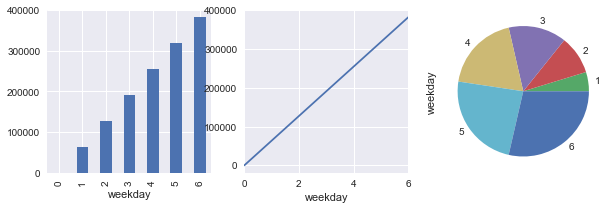

In [25]:
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
data_all.groupby(['weekday']).weekday.sum().plot(kind='bar')
plt.subplot(1,3,2)
data_all.groupby(['weekday']).weekday.sum().plot()
plt.subplot(1,3,3)
data_all.groupby(['weekday']).weekday.sum().plot(kind='pie')
print dict(data_all.groupby(['weekday']).weekday.sum())
#Начиная с понедельника идет ярко выраженный линейный рост чисоа поездок... это странно!!!

In [26]:
#Добавим столбцы, которые нам потом понадобятся
for col in ['lr_trips', 'lr_resid', 'lr_resid_diff24', 'lr_resid_diff24_1',
            'pred_trips0', 'pred_trips', 'pred_resid'
           ]:
    data_all[col] = 0

<center>__Кластеризация выполнена ранее__ (файл "_Clustering")</center>

__1.__ Составьте из данных о поездках прямоугольную таблицу так, чтобы по строкам было время, а по столбцам идентификатор ячейки (возьмите только те, которые были отобраны на второй неделе). __ Не используйте данные за последние имеющиеся месяцы — май и июнь 2016! __ 

In [27]:
#Загружаем результаты кластеризации и переходим на поле END_CLUST
reg_clust_all = pd.read_csv(w4_fname_reg_clust, sep=',') #считаем из файлоа
reg_clust_one = reg_clust_all[reg_clust_all.one==1].sort_values(by='label').reset_index(drop=True)[['label','region']]

In [28]:
#проставим номер кластера в данных о поездках для обучения и в данных с тестовой частью
data_all['one_clust'] = np.array(data_all.merge(reg_clust_one, how ='left', on = ['region']).label.fillna(0), int)
data_all['reg_clust'] = np.array(data_all.merge(reg_clust_all, how ='left', on = ['region']).label.fillna(0), int)
#кластеры для списке регионов
data_reg['reg_clust'] = np.array(data_reg.merge(reg_clust_all, how ='left', on = ['region']).label.fillna(0), int)
data_reg['one_clust'] = np.array(data_reg.merge(reg_clust_one, how ='left', on = ['region']).label.fillna(0), int)

In [29]:
# data_all.head(1)

<center>__Прогнозируем (Кластер,Фолд)__</center>

__ПРИНЦИП ОБУЧЕНИЯ:__
Всегда обучаем одну модель для одного набора данных. Результаты обучения записываем в файл. Финальный разбор полетов проводим отдельно, загружая все файлы в единую структуру

In [30]:
cN  = 4          #номер кластера
cF  = 1          #номер фолдера (набора данных для пронозирования)
cNF = cpX(cN,cF) #номер кластера + Номер фолда
if cF == 1:      #даты для прогноза разных Фолдов
    cpred_beg = pd.datetime(2016,4,30, 23, 0) #начальная дата прогноза (Фолд 1)
    cpred_end = pd.datetime(2016,5,31, 17, 0) #конечная дата прогноза  (Фолд 1)
else: 
    cpred_beg = pd.datetime(2016,5,31, 23, 0) #начальная дата прогноза  (Фолд 2)
    cpred_end = pd.datetime(2016,6,30, 17, 0) #конечная дата прогноза   (Фолд 2)

print 'cN {}, cF {}, cNF {}, диапазон {}-{}'.format(cN, cF, cNF, cpred_beg, cpred_end)

cN 4, cF 1, cNF 41, диапазон 2016-04-30 23:00:00-2016-05-31 17:00:00


In [163]:
#Имена файлов для записи-считывания резальтатов расчетов 
prmsPDQ_fname  = w4_fname+'_c'+str(cN) +'_prmsPDQ'
casrMod_fname  = w4_fname+'_c'+str(cNF)+'_mod'
casrPrms_fname = w4_fname+'_c'+str(cNF)+'_mod_prms'
cXpredH6_fname = w4_fname+'_c'+str(cNF)+'_pred_h6'
cXpred_fname   = w4_fname+'_c'+str(cNF)+'_pred.csv'
cXreg_fname    = w4_fname+'_c'+str(cNF)+'_reg.csv'
cXanswer_fname = w4_fname+'_c'+str(cNF)+'_answer.csv'

Сначала надо определить парамеметры модели. Для этого используем Фолдер 1 (точнее, его хвост в 300 элементов)

In [164]:
#Все по ВСЕМ датам и по ВСЕМ регионам
cXall = data_all[data_all.reg_clust == cN]
#Данные ОДНОГО региона и ОДНОГО фолдера
cX    = data_all[(data_all.one_clust == cN) & (data_all.fold <> 0) & (data_all.fold <= cF)]
#Все районы кластера 
cXreg = data_reg[data_reg.reg_clust == cN] #надо ли?...

Обучим линейную регрессию __исключительно__ для того, чтобы подобрать праметры модели. При этом мы предполагаем, что SARIMAX сделает тоже самое внутри себя. __Иначе нам надо обучать SARIMAX именно на этих остатках, но в задании указано так не делать__.

In [165]:
%%time
#У нас всего один район-центр кластера
cLR_reg = linear_model.LinearRegression() 
cLR_reg.fit(cX[lr_cols], cX.trips) #обучаем модель
cX.loc[:, 'lr_trips']          = np.array(cLR_reg.predict(cX[lr_cols]), int) #предсаказние 
cX.loc[:, 'lr_resid']          = cX.trips    - cX.lr_trips                   #остатки 
cX.loc[:, 'lr_resid_diff24'  ] = cX.lr_resid - cX.lr_resid.shift(24) 
cX.loc[:, 'lr_resid_diff24_1'] = cX.lr_resid_diff24 - cX.lr_resid_diff24.shift(1) 

cLR_MAE = metrics.mean_absolute_error(cX.trips, cX.lr_trips) #метрика MAE 
cLR_R2  = metrics.r2_score(cX.trips, cX.lr_trips)            #метрика R^2 

Wall time: 425 ms


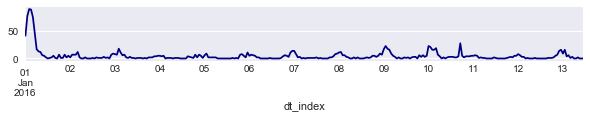

In [166]:
#Для обучения возьмем хвост, по которому мы будем определять оптимальные параметры
cXtail = cX[:300]
plt.figure(figsize(10,1))
cXtail.trips.plot(c='navy')

__Этап подбора входных параметров SARIMAX__

In [167]:
if cF <> 1: raise Exception(u'Fitting params for FOLD-1 only')

Среднее остатков 0.512052341598, R^2 0.154328243302, MAE 4.7902892562


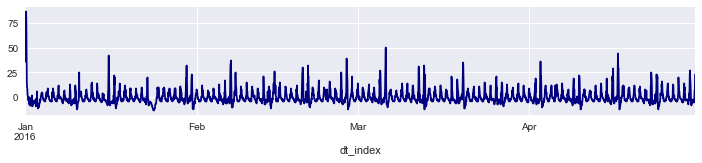

In [168]:
plt.figure(figsize(12,2))
cX.lr_resid.plot(c='navy') #, style='ro'  # Посмотрим на остатки
print 'Среднее остатков {}, R^2 {}, MAE {}'.format(cX.lr_resid.mean(), cLR_R2, cLR_MAE)
plt.show()

Остатки не имеют тренда, но в них видны внутрисуточные колебания, мы их не устраняли. Посмотрим на декомпозицию остатков: регрессии

Критерий Дики-Фуллера (без диффиренцирования): p=0.000000
Критерий Дики-Фуллера (сезонное дифференцирование): p=0.000000


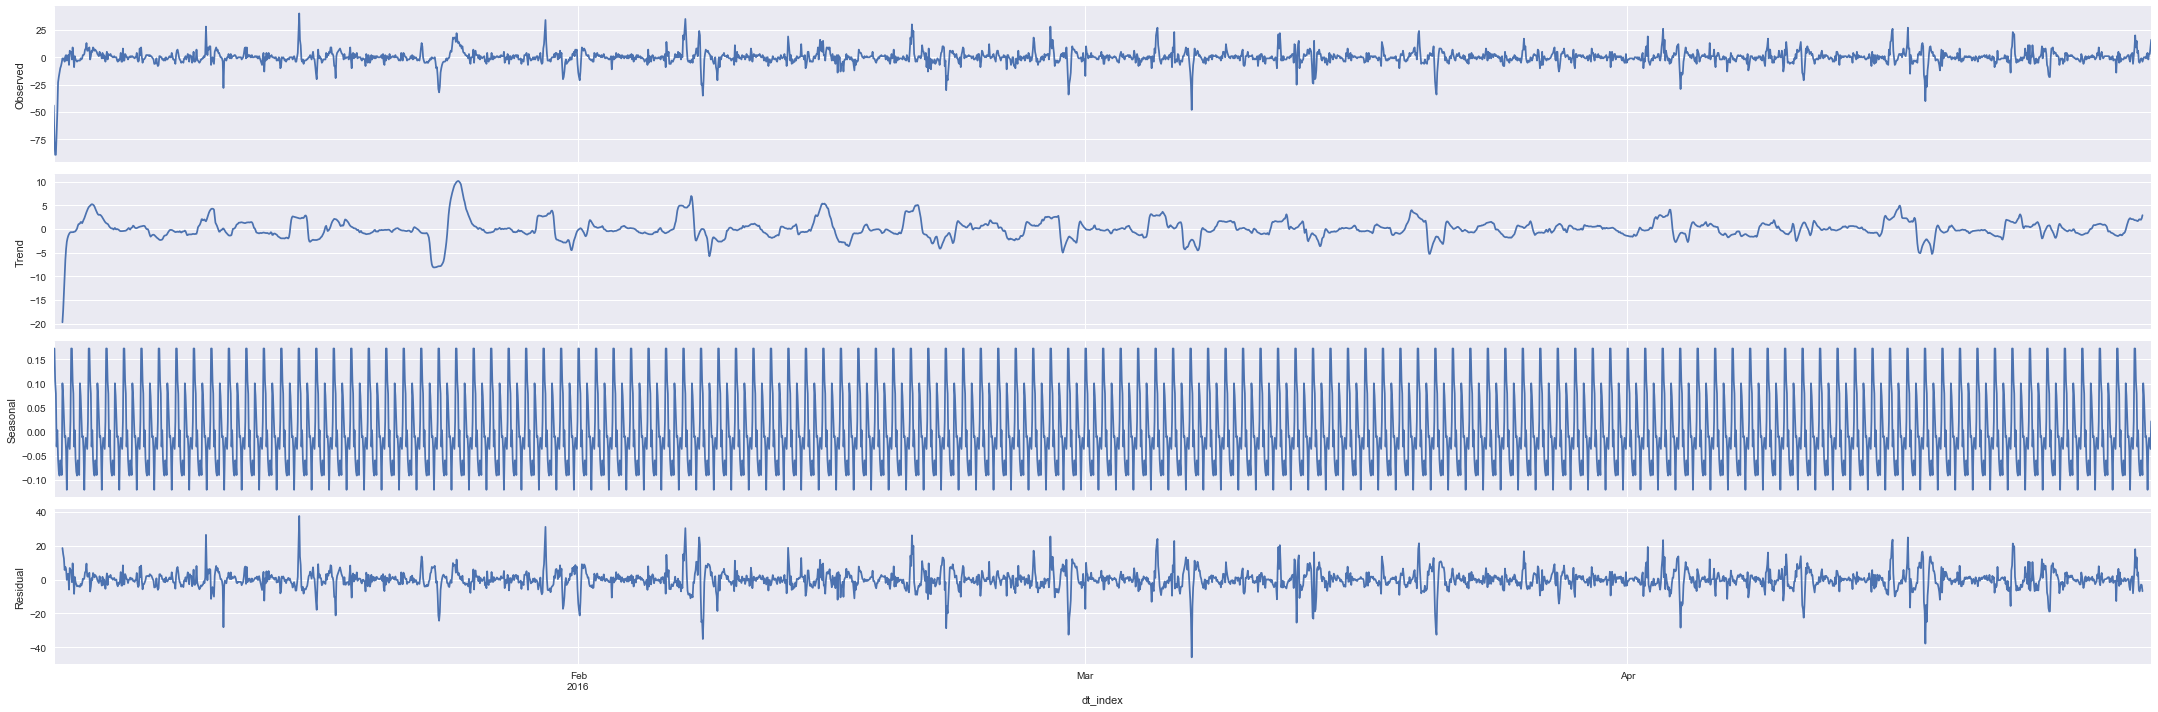

In [169]:
# Поскольку очевидно имеется дневная сезонность, то без сезонного дифференцирования смотреть смысла нет
print("Критерий Дики-Фуллера (без диффиренцирования): p=%f"      % sm.tsa.stattools.adfuller(cX.lr_resid[:])[1])
print("Критерий Дики-Фуллера (сезонное дифференцирование): p=%f" % sm.tsa.stattools.adfuller(cX.lr_resid_diff24[24:])[1])
plt.figure(figsize(30,10))
# p = sm.tsa.seasonal_decompose(cdata[cN].lr_resid, freq=24).plot()   #без дифференцирования ряд явно не стационарен
p = sm.tsa.seasonal_decompose(cX.lr_resid_diff24[24:], freq=24).plot()
plt.show()


В тренде явно просматривается какая-то структура, видимо, следует применить __обычное дифференцирование__

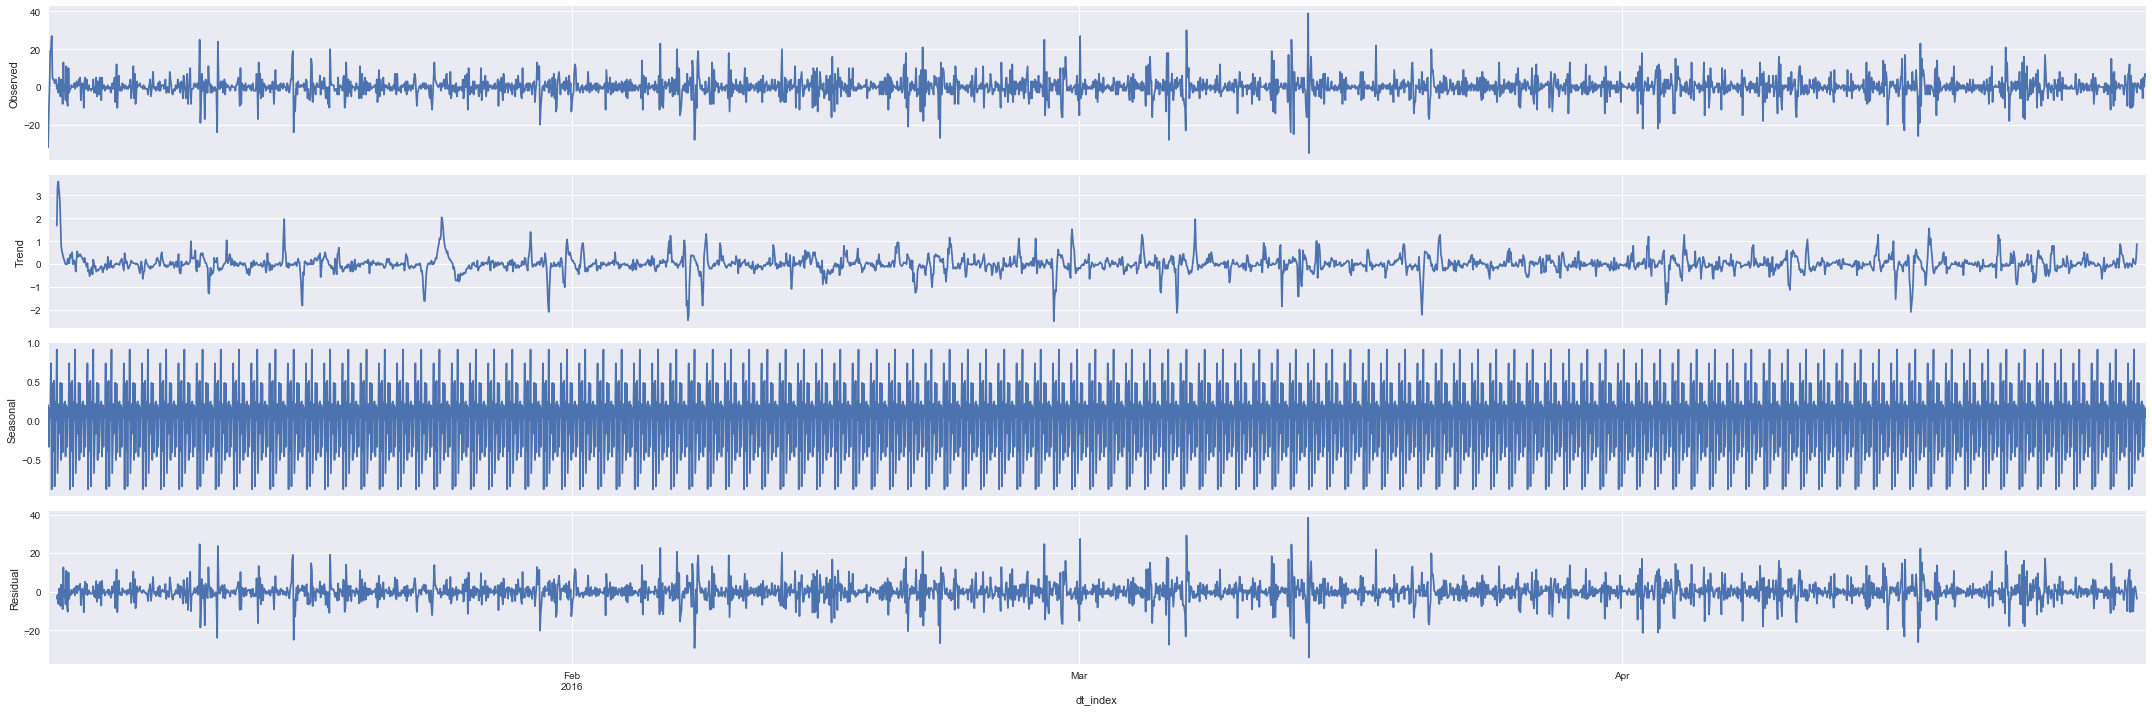

In [170]:
p = sm.tsa.seasonal_decompose(cX.lr_resid_diff24_1[25:], freq=25).plot()  #без дифференцирования ряд явно не стационарен

Теперь явная структура в данных не видна, остатки похожи на случайные, Критерий Дики-Фуллера уверенно отвергает нестационарность ряда. Преобразованный ряд __достаточно хорош__ для моделирования. Подбираем __коэффициенты SARIMAX__

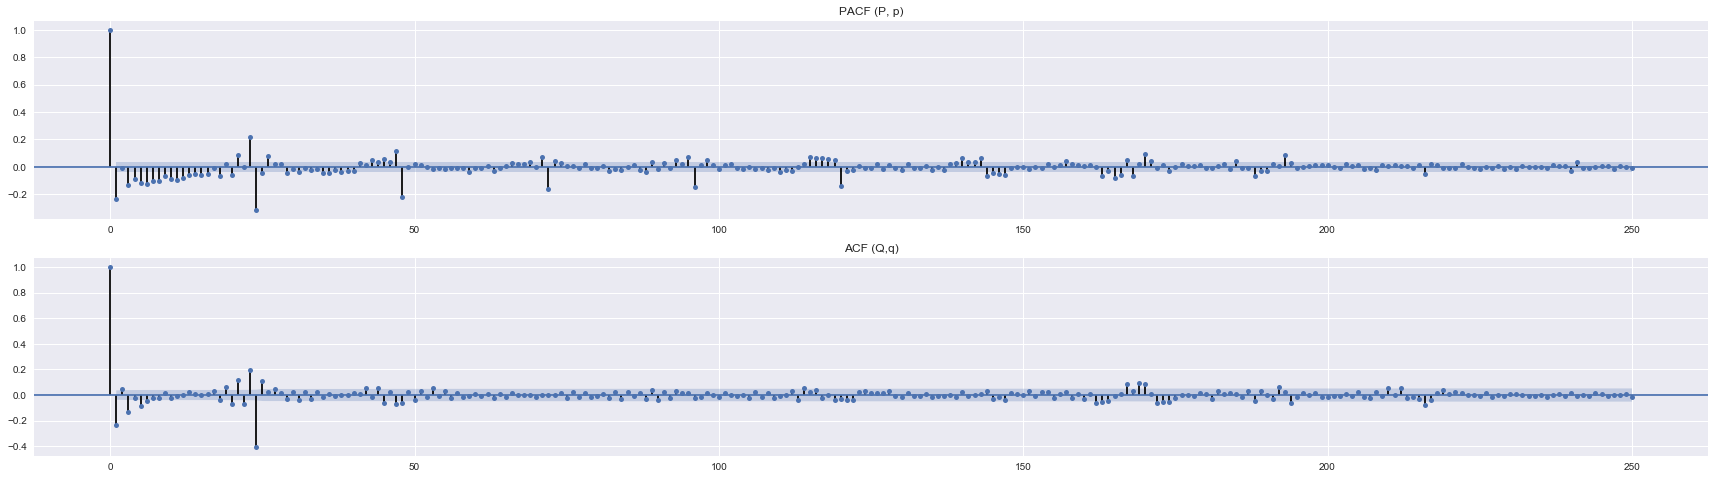

In [171]:
plt.figure(figsize(30,8))
ax = plt.subplot(211)
pacf= sm.graphics.tsa.plot_pacf(cX.lr_resid_diff24_1[25:].values.squeeze(), lags=250, ax=ax, title=u'PACF (P, p)')
ax = plt.subplot(212)
acf = sm.graphics.tsa.plot_acf(cX.lr_resid_diff24_1[25:].values.squeeze(), lags=250, ax=ax, title=u'ACF (Q,q)')
pylab.show()

In [236]:
cPs, cps, cQs, cqs , cDs, cds= 7, 1, 2, 1, 1, 0 #подбираем адекватные значения границ для перебора параметров 
print 'order (p=[0,{}] d={} q=[0,{}]), seasonal (P=[0,{}] D={} Q=[0,{}])'.format(cps, cds,  cqs, cPs, cDs, cQs)

order (p=[0,1] d=0 q=[0,1]), seasonal (P=[0,7] D=1 Q=[0,2])


Обучение модели SARIMAX __очень долгое__. Предлагается стратегия, выполняющая перебор параметров таким образом, чтобы __начинать с мнинмального времени обучения, и заканчивать максимальным__. Для этого нам потребуется умение __предсказывать время обучения__. Что мы и сделаем с помощью линейной регрессии. В сущности, нам не надо точно предсказывать время, нам нужно уловить порядок перебора параметров.  
Обучение регрессии очень быстрое и производится при вызове функции fit_sarimax_prms с параметом fit_exp=True (по умолчанию)

In [237]:
cload = False
if cload == False:
    #Первоначальное наполнение по диапазонам
    cXprmsPDQdic  = {'p':range(0,cps+1),'d':range(0,cds+1),'q':range(0,cqs+1), # d=1 !!!!!!!!
                     'P':range(0,cPs+1),'D':range(1,cDs+1),'Q':range(0,cQs+1)}
    cXprmsPDQdata = list(itertools.product([cN],
                                     cXprmsPDQdic['p'], cXprmsPDQdic['d'], cXprmsPDQdic['q'], 
                                     cXprmsPDQdic['P'], cXprmsPDQdic['D'], cXprmsPDQdic['Q'], [0], [0], [0], [0], [0]))    
    cXprmsPDQ = pd.DataFrame(columns = ['cN', 'p','d','q','P','D','Q', 'done', 'aic', 'time','exp_time', 'exp_aic'],
                             data = cXprmsPDQdata)
else:
#     cXprmsPDQ = pd.DataFrame(columns = ['cN', 'p','d','q','P','D','Q', 'done', 'aic', 'time','exp_time', 'exp_aic'])
#     for c in ['cN', 'p','d', 'q','P','D','Q', 'done']: prms0[c] = int(0) #приводим к целому типу (иначе float отказывается)
    cXprmsPDQ = pd.read_csv(prmsPDQ_fname, sep=',') #из отдельных файлов
    cXprmsPDQ.drop_duplicates(inplace=True) #если загрузили два раза случайно, могут быть возникнуть дубли 

In [238]:
cXprmsPDQ.head(3)

,cN,p,d,q,P,D,Q,done,aic,time,exp_time,exp_aic
0,4,0,0,0,0,1,0,0,0,0,0,0
1,4,0,0,0,0,1,1,0,0,0,0,0
2,4,0,0,0,0,1,2,0,0,0,0,0


In [32]:
%%time 
# Только для подбора параметров
fit_sarimax_prms(m_dt=cXtail, m_prms=cXprmsPDQ, m_count=10, fname = prmsPDQ_fname) #запись после каждой комбинации m_cN=cN
cXprmsPDQ.to_csv(prmsPDQ_fname, index=False) 

In [188]:
print 'Обучено {} из {}, общее время {:.2f}ч.'.format(cXprmsPDQ[cXprmsPDQ.done==1].shape[0],
                                              cXprmsPDQ.shape[0], cXprmsPDQ[cXprmsPDQ.done==1].time.sum()/60.)
#                                                 round(cexp_time_MAE[cN],2), round(cexp_aic_MAE[cN],2))

Обучено 10 из 96, общее время 0.05ч.


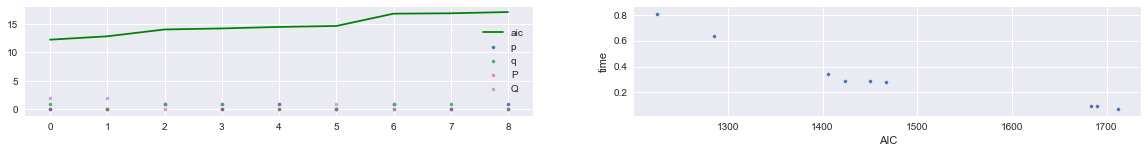

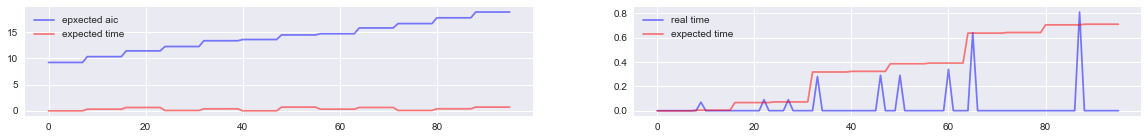

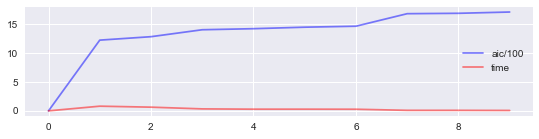

In [189]:
draw_sarimax_prms(cXprmsPDQ) #визуализация завистимости качества модели от параметров

In [190]:
cXprmsPDQ[(cXprmsPDQ.done==1)].sort_values(by=['aic'], ascending=True).drop(['exp_time','exp_aic'], axis=1)[:2]

,cN,p,d,q,P,D,Q,done,aic,time
0,4,0,1,0,0,1,0,1,0.000000,0.00
26,4,0,1,1,0,1,2,1,1225.432215,0.81


In [191]:
#time 0.87 ~ 6 минут = в полных данныъ => time 1 ~ 10 минут
#выбранные параметры модели (!!!главный критерий - считается меньше минуты!!!)
cXprmsPDQget = cXprmsPDQ.query('done == 1 & time < 1 & aic > 0').sort_values(by=['aic'], ascending=True)[:1]

In [192]:
cXprmsPDQget

,cN,p,d,q,P,D,Q,done,aic,time,exp_time,exp_aic
26,4,0,1,1,0,1,2,1,1225.432215,0.81,0.704667,1443.241747


In [193]:
#ключи справочника P,q,Q,q,Dd,L (L- дневная сезонность)
cPDQ = cXprmsPDQget[['p','d','q','P','D','Q']].astype(int).to_dict(orient='index').values()[0] 
cPDQ['L'] = 24                                                             #

In [194]:
cPDQ # (0, 0, 2, 1, 1, 2) лучше, (0, 0, 0, 8, 1, 0) еще лучше, но очень долго
# {'D': 1, 'L': 24, 'P': 3, 'Q': 0, 'd': 0, 'p': 0, 'q': 0}

{'D': 1, 'L': 24, 'P': 0, 'Q': 2, 'd': 1, 'p': 0, 'q': 1}

__Подбор параметров завершен. Теперь ВАЖЕН ФОЛДЕР!__

In [195]:
print cNF, cPDQ

41 {'Q': 2, 'd': 1, 'P': 0, 'L': 24, 'q': 1, 'p': 0, 'D': 1}


Обучаем модель __для выбранного Фолда__

In [196]:
%%time
cload = False
if cload == False:
    #Создаем и обучаем модель #3min 46s
    caic, cmod = fit_sarimax(cX, cPDQ['p'], cPDQ['d'], cPDQ['q'], cPDQ['P'], cPDQ['D'], cPDQ['Q'], LAG=24, trend='n')  
    cmod.save(casrMod_fname)           #сохраняем модель (почти 900 МБ)
    cmod.params.to_csv(casrPrms_fname) #сохраняем параметры модели
    cmod_params = cmod.params       #для удобства скидываем параметры в локальную переменную

else: #Или Загружаем уже обученную модель из файла
    caic        = 0                                 #не записываем AIC в файлы
#     cmod        = ARIMAResults.load(casrMod_fname)   #867 mb    НУЖНА ЛИ САМА МОДЕЛЬ???
    cmod        = ARIMAResults                     #SARIMAX для предсказания
    cmod_params_load = pd.read_csv(casrPrms_fname, header=None, index_col=0)
    cmod_params_load.index.name = ''                    #сбрасываем имя индекса
    cmod_params = cmod_params_load.T.squeeze()        #преобразуем DataFrame в Series (модель только так принимает)

Wall time: 7min 13s


In [197]:
# Прогнозирование центрального ряда кластера (не обязательно, в задании не требуется)
cload = False
if cload == True:
    cmod = ARIMAResults.load(casrMod_fname)   #867 ms    НУЖНА ЛИ САМА МОДЕЛЬ???
cX.loc[:, 'pred_trips0'] = cmod.fittedvalues #проставляем данные модели (в т.ч. с отрицательными значениями)
cX.loc[:, 'pred_trips']  = cmod.fittedvalues #проставляем данные модели для сравнения
cX.loc[cX.pred_trips < 0 , 'pred_trips'] = 0 #и заменяем отрицательные значения на нули

print cX.pred_trips0.min(), '=>', cX.pred_trips.min()  #теперь нет отрицательных значений. 

-28.358191107 => 0.0


По-видимому, __отрицательные значения__ позникают из-за отрицательного __тренда__, но дифференцирование не избавляет от него, и отрицательные значения остаются. С этим __надо что-то делать__. Пока решение простое - __обунляем__ отрицательные значения. На коэффиценте $R^2$ это не сказывается, но позволяет созранить логику данных о поездках, они не могут быть отрицательными.

pred_trips : R^2 0.73
Критерий Стьюдента: p=0.965195 , Дики-Фуллера: p=0.000000


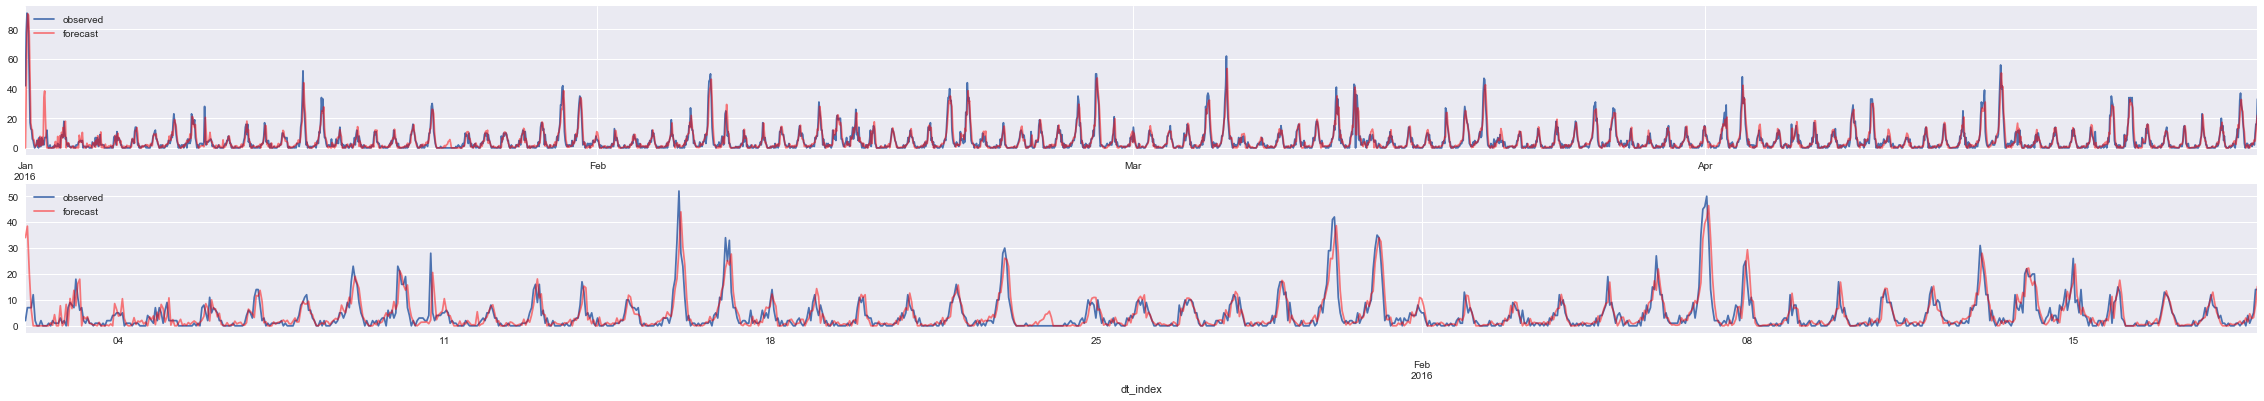

In [198]:
draw_model_fitting(cX, cmod, 'pred_trips', fsize=(40,6)) #дважды щелкаем по графику, чтобы его раскрыть

pred_trips


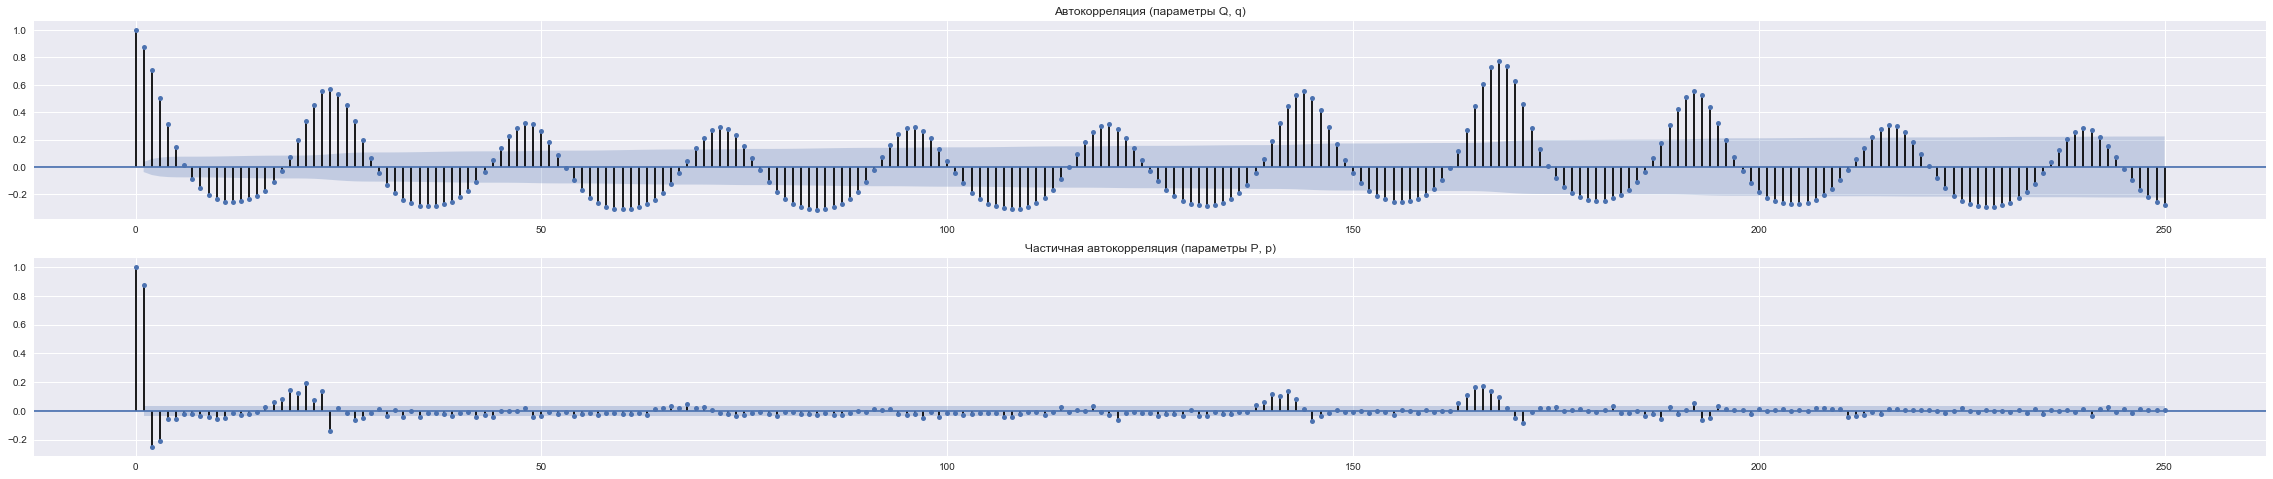

In [199]:
draw_model_p_acf(cX, 'pred_trips', fsize=(40,8)) #дважды щелкаем по графику, чтобы его раскрыть

Обычная каррлограмма похоже сохраняет сезонность, частичная - не очень.

__Посмотрим на остатки модели__

In [200]:
cX.loc[:, 'pred_resid']  = cX.trips - cX.pred_trips #остатки (отклонение от предсказания)

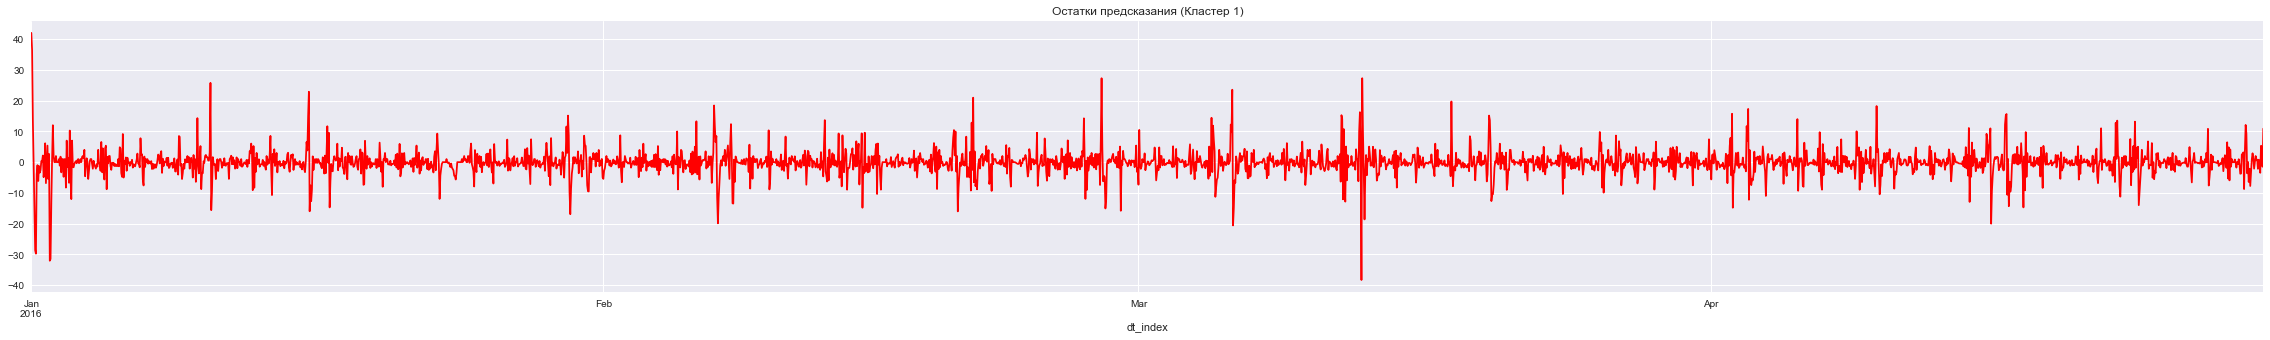

In [201]:
plt.figure(figsize(40,5))
cX.pred_resid.plot(c='red')
plt.title(u'Остатки предсказания (Кластер 1)')

In [202]:
print "Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(cX.pred_resid)[1]

Критерий Дики-Фуллера: p=0.000000


__ Оценим качество прогнозирование на том районе, на котором обучались __

__Вывод__: точность для таких данных 0.6, видимо, __нормальная__,  ряд остатков стационарен по критерию Дики-Фуллера. Размер файла модели 520Мб, что более менее нормально. Дальше можно выбирать более подходящие параметры, но ждать придется долго и размер модели будет большой.

P.S. комбинация p,d,q,P,D,Q=0,0,2,1,1,2 давала R^2 0.66 ...

__Строим прогноз Кластера по Всем районам__

__Фолд 1__ Для каждой из  $R$  географических зон настройте на данных __до апреля 2016 включительно__ модель ARIMA с гиперпараметрами, соответствующими кластеру этой зоны. Для каждого конца истории от 2016.04.30 23:00 до 2016.05.31 17:00 постройте прогноз на 6 часов вперёд.
__Фолд 2__ Для каждой из $R$ географических зон настройте на данных __до мая 2016 включительно__ модель ARIMA с гиперпараметрами, соответствующими кластеру этой зоны. Для каждого конца истории от 2016.05.31 23:00 до 2016.06.30 17:00 постройте прогноз на 6 часов вперёд.

In [217]:
cPDQ

{'D': 1, 'L': 24, 'P': 0, 'Q': 2, 'd': 1, 'p': 0, 'q': 1}

In [218]:
print 'order ({},{},{})'.format(cPDQ['p'],cPDQ['d'],cPDQ['q']), 
print 'seasonal ({},{},{},{})'.format(cPDQ['P'],cPDQ['D'],cPDQ['Q'],cPDQ['L'])

order (0,1,1) seasonal (0,1,2,24)


In [219]:
cXreg.loc[:, 'done'] = 0

In [220]:
cload = False
if cload == False:
    cXpredH6 = pd.DataFrame(columns = ['dt_start','cN','cF','cNF','num', 'region','done','time','H1','H2','H3','H4','H5','H6'])
else: # cXpredH6.drop(u'Unnamed: 0', axis=1, inplace=True)
    cXpredH6 = pd.read_csv(cXpredH6_fname, sep=',', parse_dates=['dt_start']) #загружаем список параметров с результатами подбора

In [221]:
#Проставим признак обработанных данных
cXreg['done'] = 0 
cXreg.loc[cXreg.region.isin(np.unique(cXpredH6.region)), 'done'] = 1

In [222]:
print 'Приблизительно 15 минут один район, т.к. весь кластер около {} ч.'.format(cXreg.shape[0]*15 /60.)

Приблизительно 15 минут один район, т.к. весь кластер около 5.0 ч.


In [223]:
cXreg.groupby(['done'], as_index=False).done.size() #посмотрим, сколько уже спрогнозировано, и сколько осталось

done
0    20
dtype: int64

In [225]:
%%time
#перебираем районы (если модель еще не обучена и exp_time=0, оставим сортировку по параметрам)
step     = 0
wall_len = 0

for i, r in cXreg[(cXreg.done==0)].sort_values(by=['region'])[:1].iterrows(): 
    step += 1 
   
    cRegNum  = int(r.region)                  #очередной район 
    cXallReg = cXall[cXall.region==cRegNum]   #и его данные 
   
    t = ti.default_timer()                    #старт прогнозирования района 
   
    predH6 = get_sarimax_predH6(m_cNF=cNF, m_RegNum=cRegNum, #m_count=1000,  #всего около 15 минут на район 
        m_mod_params = cmod_params, m_PDQ = cPDQ, m_dt_all = cXallReg, date_beg=cpred_beg, date_end=cpred_end, 
        say_each=100) 

    cXpredH6.drop(cXpredH6[cXpredH6.region==cRegNum].index, axis=0, inplace=True) #удаляем прежние результаты (если они были)
    cXpredH6 = pd.concat([cXpredH6, predH6])                                      #подстыковываем новые данные
    cXpredH6.to_csv(cXpredH6_fname, index=False)                                  #сохраняем резульаты прогноза (ВСЕ районы)
    cXreg.loc[(cXreg.region == cRegNum), 'done'] = 1                              #ставим флаг выполнения прогноза по району
    
    t1 = ti.default_timer()         #завершение прогнозирования района

    step_len  = round((t1-t)/60.,2) #длительность прогнозирования района
    wall_len += step_len            #суммарная длительность прогнозирования

print 'Прогнозирование завершено за {:.2f}м.'.format(wall_len)

Район 1129, начало в 16:13:37, записей 739
Модель настроена 16:14:08
100 (0.01мин)  200 (0.01мин)  300 (0.01мин)  400 (0.01мин)  500 (0.01мин)  600 (0.01мин)  700 (0.01мин)  Район 1129, завершение в 16:22:51 (0.12ч)
Прогнозирование завершено за 9.25м.
Wall time: 9min 14s


In [226]:
cXpredH6.region.unique() #спрогнозированные районы

array([ 1129.])

In [227]:
cXpredH6.to_csv(cXpredH6_fname, index=False) #сохраняем резульаты прогноза (ВСЕ районы)

__Теперь надо преобразовать данные, записать их в файл и посчитать метрику__

In [228]:
cXpred = get_XpredOnH6(cXpredH6) #Разворачивает таблицу, чтобы значения я предсказанных данных попали из столбцов в строки

In [229]:
#Сформируем данные о реальных поездках в прогнозируемый период в разрезе каждого Региона и Конца истории (dt_start)
cXpredReal = pd.merge(cXpred[['dt_start','dt_hour','region']], cXall[['dt_hour','region','trips']],
         how='inner', on=['dt_hour','region']).sort_values(by=['dt_hour'])[['dt_start','dt_hour','region', 'trips']]
#Присоединим данные о реальных поездках к каждому концу истории и дате в рамках него
cXpred['real_trips']      = pd.merge(cXpred, cXpredReal, how='inner', on=['dt_start','dt_hour','region'])['trips']
cXpred['delta_trips']     = cXpred['pred_trips'] - cXpred['real_trips']
cXpred['delta_trips_abs'] = cXpred['delta_trips'].abs()

In [230]:
cXpred.to_csv(cXpred_fname, index=False) #сохраним в файле

In [231]:
cXpred.head(1)

,dt_start,cN,cF,cNF,region,num,done,time,hour_num,pred_trips0,dt_hour,pred_trips,real_trips,delta_trips,delta_trips_abs
0,2016-04-30 23:00:00,4.0,1.0,41.0,1129.0,0.0,1.0,0.01,H1,832.569782,2016-05-01,833,994,-161,161


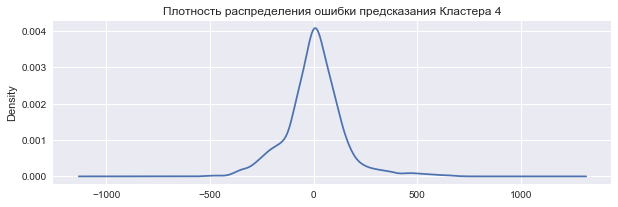

In [232]:
plt.figure(figsize=(10,3))
cXpred.delta_trips.plot(kind='kde', title=u'Плотность распределения ошибки предсказания Кластера '+str(cN))

Получили результат предсказания, теперь __надо вычислить метрику__

Посчитайте в ноутбуке ошибку прогноза по следующему функционалу:
$Q_{may} =\frac1{R* 739* 6} \sum\limits_{r=1}^{R} \sum_{T=2016.04.30\,23:00}^{2016.05.31\,17:00} \sum_{i=1}^6 \left| \hat{y}^r_{T|T+i} - y_{T+i}^r \right|.$  


In [233]:
# Разложим метрику по районам (теоретически можно анализировать зависимость Q по дальности района до ценра кластера)
cXreg.loc[:, 'Q'] = 0.0
cXpred.loc[:, 'region'] = cXpred.region.astype(int, inplace=True)

cXregQ = cXpred.groupby('region', as_index=False).delta_trips_abs.sum()
cXregQ['region'] = cXregQ.region.astype(int)
cXregQ['pred_Q'] = cXregQ.delta_trips_abs/(739.*6.) # cXpred.groupby('region').delta_trips_abs.sum()/(739.*6.)

cXreg = cXreg.reset_index(drop=True)
cXreg.loc[:, 'Q'] = pd.merge(cXreg, cXregQ, how='left', on=['region']).pred_Q.fillna(0)

cXreg.to_csv(cXreg_fname, index=False) #сохраним в файле

In [234]:
cQ = sum(cXreg.Q)/(cXreg[cXreg.done==1].shape[0]) #sum(abs(cXpred.delta_trips))/(len(cXpred.region.unique())*739.*6.)

In [235]:
print 'Метрика Q (Кластер {}, Фолд {}): {:.2f}'.format(cN, cF, cQ)

Метрика Q (Кластер 4, Фолд 1): 99.62


__Вывод__: метрика показывает существенное отличие прогнозируемых данных от реальных данных, в среднем на __73__ поездки.  
__Модель нуждается в улучшении__. Отрицательные значения, которые мы просто обнулили, показывают, что в модели остался отрицательный тренд.

P.S. комбинация p,d,q,P,D,Q=0,0,2,1,1,2 была лучше

__Фолд 2__ запишите все прогнозы в файл в формате id,y, где столбец id состоит из склеенных через подчёркивание идентификатора географической зоны, даты конца истории, часа конца истории и номера отсчёта, на который делается предсказание (1-6); столбец y — ваш прогноз.  


In [100]:
cXpred['save_id'] = cXpred.region.astype(int).astype(
    str) + '_' + cXpred.dt_start.dt.date.astype(str) + '_' + cXpred.hour_num.astype(str).apply(lambda x:x[-1:])

In [101]:
cXpred[['save_id', 'pred_trips']].to_csv(cXanswer_fname, index=False, header=False)

__Блок определения пользовательских функций__

In [2]:
#Получает датасет с набором дат для предсказания, выполняет предсказание и сохраняет результыт в файл
def get_XpredOnH6(m_predH6m):
    #Разворачиваем таблицу, чтобы значения я предсказанных данных попали из столбцов (так было легче сохранять в файл) в строки
    m_Xpred = pd.melt(m_predH6m.reset_index(), 
            id_vars    = ['dt_start','cN', 'cF','cNF', 'region', 'num', 'done', 'time'], 
            value_vars = ['H1','H2','H3','H4','H5','H6'],
            var_name   = 'hour_num', 
            value_name = 'pred_trips0').sort_values(by=['dt_start','hour_num']).reset_index(drop=True)
    #Преобразуем значение Hx в столбце hour_num в количество частов смещения hour_num.apply(lambda x:x[-1:]), 
    #а затем в реальную дату
    m_Xpred['dt_hour']    = m_Xpred.dt_start + m_Xpred.hour_num.apply(lambda x:pd.Timedelta(hours=int(x[-1:])))
    m_Xpred['pred_trips'] = m_Xpred.pred_trips0.round(0).astype(int) #округляем остатки
    m_Xpred.loc[m_Xpred['pred_trips'] < 0 , 'pred_trips'] = 0        #и заменяем отрицательные значения на нули 

    return m_Xpred

In [3]:
#Получает датасет с набором дат для предсказания, выполняет предсказание и сохраняет результыт в файл
def get_sarimax_predH6(m_cNF, m_RegNum, m_mod_params, m_PDQ, m_dt_all, 
                       date_beg, date_end, verbose=True, say_each=None, conf_int=False):
    m_step      = 0 
    m_wall_len  = 0

    m_H6 = pd.DataFrame(columns = ['dt_start'], data = pd.date_range(date_beg, date_end, freq='H')) #даты для прогноза
    m_H6['num' ]   = m_H6.index           #индекс для перебора дат
    m_H6['region'] = cRegNum              #район 
    m_H6['cNF']    = cNF                  #КластерФолд
    m_H6['cN']     = int(str(m_cNF)[:1 ]) #Кластер
    m_H6['cF']     = int(str(m_cNF)[-1:]) #Фолд

    m_H6_count     = m_H6.shape[0]        #число записей для прогноза (одинаковое для всех кластеров, районов и фолдов)

    #информация о начале расчета
    if verbose == True: print u'Район {}, начало в {}, записей {}'.format(
        m_RegNum, dt.datetime.now().strftime('%H:%M:%S'), m_H6_count)
    
    #модель для предсказания (на основе подобранных параметров для кластера)
    m_model = sm.tsa.statespace.SARIMAX(m_dt_all.trips,
                                        order=(m_PDQ['p'],m_PDQ['d'],m_PDQ['q']),
                                        seasonal_order=(m_PDQ['P'],m_PDQ['D'],m_PDQ['Q'],m_PDQ['L']), 
                                        exog = m_dt_all[lr_cols]).filter(m_mod_params)

    #информация об обучении модели
    if verbose == True: print u'Модель настроена {}'.format(dt.datetime.now().strftime('%H:%M:%S'))

    #перебираем прогнозируемые даты
    for i, r in m_H6.sort_values(by=['num'], ascending=True).iterrows():

        m_step += 1
        m_t = ti.default_timer()                         #время начала
       
        m_time_beg = (r.dt_start + pd.Timedelta(hours=1)).to_pydatetime() 
        m_time_end = (r.dt_start + pd.Timedelta(hours=6)).to_pydatetime()
        
        #готовим внешние данные на для дополнительной регрессии в модели
        m_exog0 = m_dt_all[lr_cols].loc[(m_dt_all.dt_hour>m_time_beg) & (m_dt_all.dt_hour<=m_time_end)] 

        #выполняем прогноз
        if conf_int == True:
            m_predict = m_model.get_prediction(start=str(m_time_beg), end=str(m_time_end), exog=m_exog0, dynamic=True)
            m_predict_mean = m_predict.predicted_mean #получаем среднее значение (интервалы пока не считываем)
        else:
            m_predict_mean = m_model.predict(start=str(m_time_beg), end=str(m_time_end), exog=m_exog0, dynamic=True)
        
        m_step_len = round((ti.default_timer()-m_t)/60.,2) #длительность обучения
        m_wall_len  += m_step_len                          #суммарная длительность обучения  

        #сохраняем полученные значения
        m_H6_index = m_H6[(m_H6.num==r.num)].index       #индекс текущей строки в общем наборе параметров
        m_H6.loc[m_H6_index, 'done'] = 1                 #признак обработанной строки
        m_H6.loc[m_H6_index, 'time'] = m_step_len        #сохраняем длительность выполнения
        m_H6.loc[m_H6_index, 'H1']   = m_predict_mean[0] #проноз на 1 час   вперед
        m_H6.loc[m_H6_index, 'H2']   = m_predict_mean[1] #проноз на 2 часа  вперед
        m_H6.loc[m_H6_index, 'H3']   = m_predict_mean[2] #проноз на 3 часа  вперед
        m_H6.loc[m_H6_index, 'H4']   = m_predict_mean[3] #проноз на 4 часа  вперед
        m_H6.loc[m_H6_index, 'H5']   = m_predict_mean[4] #проноз на 5 часов вперед
        m_H6.loc[m_H6_index, 'H6']   = m_predict_mean[5] #проноз на 6 часов вперед
        
        if verbose == True and (say_each == None or m_step % say_each == 0): 
            print u'{} ({}мин) '.format(m_step, m_step_len), 

    #информация о завершении расчета
    if verbose == True: print u'Район {}, завершение в {} ({:.2f}ч)'.format(
        m_RegNum, dt.datetime.now().strftime('%H:%M:%S'), m_wall_len/60.)

    #возвращаем данные
    return m_H6


In [4]:
def fit_sarimax(dt, p, d, q, P, D, Q, LAG=24, simple_diff=False, stationar=False, invert=False, trend=None):    

    warnings.filterwarnings('ignore')

    try: #try except нужен, потому что на некоторых наборах параметров модель не обучается

#         print 'model', 'p', p, ', q', q, ', P', P, ', Q', Q, ', d', d, 'D', D
        model=sm.tsa.statespace.SARIMAX(dt.trips.astype(float),
                                        order=(p, d, q), 
                                        #в доп. признаках учтем погоду, хотя это кардинально и не помогло
                                        exog                  = dt[lr_cols], # + weather_cols], 
                                        seasonal_order        = (P, D, Q, LAG),
                                        simple_differencing   = simple_diff, 
                                        enforce_stationarity  = stationar, 
                                        enforce_invertibility = invert,
                                        trend                 = trend 
                                       ).fit(disp=-1)

    #выводим параметры, на которых модель не обучается и переходим к следующему набору         
    except ValueError as e:
        print 'wrong parameters:',  (p, d, q, P, D, Q), e
        return (0, None) 

    warnings.filterwarnings('default')

    return (model.aic, model) 

#функция настройки модели и предсказания времени и качества обучения при подборе параметров SARIMAX
def fit_sarimax_prms_exp(m_prms, m_cols): #(m_cN,...
    #предскзываем время модели (учимся на уже обработанных done==1, предсказываем все)
    time_lr = linear_model.LinearRegression()          
    time_lr.fit(m_prms[m_prms.done==1][m_cols], m_prms[m_prms.done==1].time) 
    m_prms.loc[:, 'exp_time'] = time_lr.predict(m_prms[m_cols])
    #предскзываем AIC (учимся на уже обработанных done==1, предсказываем все)
    aic_lr = linear_model.LinearRegression()          
    aic_lr.fit(m_prms[m_prms.done==1][m_cols], m_prms[m_prms.done==1].aic)
    m_prms.loc[:, 'exp_aic'] = aic_lr.predict(m_prms[m_cols]) 

#функция предварительного обучения для подбора параметров SARIMAX
def fit_sarimax_prms(m_dt, m_prms, m_count=None, m_cols=['P','p','Q','q', 'D','d'], #m_cN,
                     fname='', save_prms=True, m_new_only=True, verbose=True, fit_exp=True): 
    step      = 0 
    wall_len  = 0
    m_prms_search = m_prms[(m_prms.done==0) | (m_new_only!=True)] #new_only - только параметры, на которых пока не обучались
 
    #перебираем параметры обучения (если модель еще не обучена и exp_time=0, оставим сортировку по параметрам)
    for i, r in m_prms_search.sort_values(by=['exp_time','P','p','Q','q', 'D','d'], ascending=True)[:m_count].iterrows():
        step += 1
        m_p, m_d, m_q, m_P, m_D, m_Q = int(r.p), int(r.d), int(r.q), int(r.P), int(r.D), int(r.Q)  #параметры обучения

        t = ti.default_timer()                         #время начала обучения

        m_aic0, m_model0 = fit_sarimax(m_dt, m_p, m_d, m_q, m_P, m_D, m_Q, 24) #обучение на параметрах
        
        step_len = round((ti.default_timer()-t)/60.,2) #длительность обучения
        wall_len  += step_len                          #суммарная длительность обучения  

        #индекс текущей строки в общем наборе параметров
        m_prms_index = m_prms[(m_prms.p==m_p) & (m_prms.d==m_d) & (m_prms.q==m_q) & 
                              (m_prms.P==m_P) & (m_prms.D==m_D) & (m_prms.Q==m_Q)].index

        m_prms.loc[m_prms_index, 'done'] = 1        #признак обработанной строки
        m_prms.loc[m_prms_index, 'aic']  = m_aic0   #сохраняем AIC
        m_prms.loc[m_prms_index, 'time'] = step_len #сохраняем длительность выполнения
        
        if verbose == True: 
            print '{}/{} time {} ({}) p{} q{} P{} Q{}'.format(
                step,
                m_prms_search.shape[0],
                round(wall_len/60.,2),
                step_len, 
                m_p, m_q, m_P, m_Q)

    #по завершении расчета записываем параметры
    if save_prms == True and fname <> '':
        m_prms.to_csv(fname, index=False) 

    #по завершении расчета записываем параметры
    if fit_exp == True:
        fit_sarimax_prms_exp(m_prms=m_prms, m_cols=m_cols) #(m_cN=m_cN,...

In [16]:
def cpX(m_cN, m_cP): return int(str(m_cN)+str(m_cP))    

#визуализация зависимости качества модели от параметров
def draw_sarimax_prms(m_prms0):
    m_prms = m_prms0[(m_prms0.done==1) & (m_prms0.aic > 0)].copy()
    m_range = range(0,m_prms.shape[0]) #m_len0  = m_prms0.shape[0]
    plt.figure(figsize(20,2))
    plt.subplot(121)
    plt.plot(m_range, m_prms.sort_values(by='aic').aic/100., c='g')
    plt.scatter(m_range, m_prms.sort_values(by='aic').p, label='p', s=10)
    plt.scatter(m_range, m_prms.sort_values(by='aic').q, label='q', s=10)
    plt.scatter(m_range, m_prms.sort_values(by='aic').P, label='P', s=10, alpha=0.5)
    plt.scatter(m_range, m_prms.sort_values(by='aic').Q, label='Q', s=10, alpha=0.5)
    plt.legend()
    plt.subplot(122)    
    plt.scatter(m_prms.sort_values(by='aic', ascending=False).aic, 
                m_prms.sort_values(by='aic', ascending=False).time, s=10)
    plt.xlabel('AIC')    
    plt.ylabel('time')
    plt.show()

    plt.figure(figsize(20,2))
    plt.subplot(121)    
    plt.plot(range(0,m_prms0.shape[0]), m_prms0.sort_values(by='exp_aic').exp_aic/100., c='b', alpha=0.5)
    plt.plot(range(0,m_prms0.shape[0]), m_prms0.sort_values(by='exp_aic').exp_time    , c='r', alpha=0.5)
    plt.legend(['epxected aic', 'expected time'])
    plt.subplot(122)    
    plt.plot(range(0,m_prms0.shape[0]), m_prms0.sort_values(by='exp_time').time, c='b', alpha=0.5)
    plt.plot(range(0,m_prms0.shape[0]), m_prms0.sort_values(by='exp_time').exp_time, c='r', alpha=0.5)
    plt.legend(['real time', 'expected time'])
    plt.show()

    plt.figure(figsize(20,2))
    plt.subplot(121)    
    plt.plot(range(0,cXprmsPDQ[(m_prms0.done==1)].shape[0]), 
             cXprmsPDQ[m_prms0.done==1].sort_values(by='aic').aic/100., c='b', alpha=0.5)
    plt.plot(range(0,cXprmsPDQ[(m_prms0.done==1)].shape[0]), 
             cXprmsPDQ[m_prms0.done==1].sort_values(by='aic').time    , c='r', alpha=0.5)
    plt.legend(['aic/100', 'time'])

#отрисовка автокорреляционной и и чатичной автокорреляционной функий модели
def draw_model_p_acf(model_data, model_column, model_lag=24, fsize=(18,5), model_ax=None):
    print model_column
    fig = plt.figure(figsize(fsize[0],fsize[1])) #plt.rcParams['figure.figsize'] = fsize # fig.set_size_inches(15,8)
    ax = plt.subplot(211)
    acf = sm.graphics.tsa.plot_acf(model_data[model_column][model_lag:].values.squeeze(), 
                             lags=250, ax=ax, title=u'Автокорреляция (параметры Q, q)')
    ax = plt.subplot(212) 
    pacf= sm.graphics.tsa.plot_pacf(model_data[model_column][model_lag:].values.squeeze(), 
                              lags=250, ax=ax, title=u'Частичная автокорреляция (параметры P, p)')
    plt.show() #ax = plt.gca()

#отрисовка результатов обучения модели
def draw_model_fitting(model_data, model_object, model_column, fsize=(12,5), model_ax=None):
    print model_column, ': R^2', 
    print round(metrics.r2_score(np.array(model_data.trips), np.around(np.array(model_data[model_column]),0)),2) 
    print "Критерий Стьюдента: p=%f" % stats.ttest_1samp(model_object.resid[24:], 0)[1], 
    print ", Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(model_object.resid[:])[1]
    fig = plt.figure(figsize(fsize[0],fsize[1]))
    plt.subplot(211)
    model_data.trips.plot(label='observed')
    model_data[model_column].plot(color='r', alpha=0.5, label='forecast') 
    plt.legend(loc='upper left')
    plt.subplot(212)
    model_data[24:168*7].trips.plot(label='observed')
    model_data[model_column][24:168*7].plot(color='r', alpha=0.5, label='forecast')
    plt.legend(loc='upper left')
    plt.show() 

def print_time(label='now'):
    print label, dt.datetime.now().strftime('%H:%M')

#Готовим данные и записываем их в файл (примерно 6 минут да 2016 год)
def load_prepare_save_data(save_fname, month_count, reg_fname=data_path + 'regions.csv', 
                           cut_regLess5 = True, save_data=True, return_data=True):
    
    #Координаты квадрата Нью_Йорка
    west_ny, east_ny, south_ny, north_ny  = -74.25559,-73.700018, 40.49612, 40.91553
    
    #Загружаем районы и получаем границы корзин
    regs = pd.read_csv(reg_fname, sep=';') 
    binx  = sorted(set(regs.west.value_counts().index)  | set(regs.east.value_counts().index ))
    biny  = sorted(set(regs.south.value_counts().index) | set(regs.north.value_counts().index))
    
    
    # Составим список файлов для обработки
    files = [data_path + 'yellow_tripdata_2016-' + ('0'+str(x+1))[-2:] + '.csv' for x in range(month_count)]# [:1] для отладкаи 5

    #Загрузим данные, ограничив их по району, количеству пассажиров и продолжительности поездки
    data_cols = ['tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count',
                 'trip_distance','pickup_longitude','pickup_latitude'] 

    dfmon_list = []
    for f in files:
        print_time('read '+ f)
        dfmon = pd.read_csv(f, sep=',', parse_dates=['tpep_pickup_datetime','tpep_dropoff_datetime'], usecols=data_cols) 
        #print_time('get del_index')
        del_index = dfmon[(dfmon.tpep_pickup_datetime == dfmon.tpep_dropoff_datetime) #Нулевая длительность
                    | (dfmon['passenger_count' ] == 0)          # поездки с нулевым количеством пассажиров
                    | (dfmon['trip_distance'   ] == 0)          # поездки с нулевым расстоянием поездки по счётчику
                    | (dfmon['pickup_longitude'] <  west_ny)    # поездки, не попадающие в прямоугольник Нью-Йорка
                    | (dfmon['pickup_longitude'] >= east_ny)    
                    | (dfmon['pickup_latitude' ] <  south_ny)   
                    | (dfmon['pickup_latitude' ] >= north_ny)  
                         ].index
        #print_time('drop del_index')
        dfmon.drop(del_index, inplace=True)
        dfmon['dt_hour'] = dfmon.tpep_pickup_datetime.dt.floor('H') #день и час (.dt.hour - только час)
        #print_time('calc reg bins')
        #Разобъем данные на квадраты
        r_bins = binned_statistic_2d(
            x = dfmon.pickup_longitude, 
            y = dfmon.pickup_latitude, 
            values = None, 
            statistic = 'count', 
            bins      = [binx, biny],
            range     = [[-74.25559, -73.70001], [40.49612, 40.91553]], expand_binnumbers = True)
        # Вычислим номер региона
        bin_regs = np.array([(x-1) * 50 + y for x, y in zip(*r_bins.binnumber)])
        #print_time('set regs')
        dfmon['region']  = bin_regs
        #print_time('aggregate')
        dfmon_agr = dfmon.groupby(['dt_hour', 'region'], as_index=False).pickup_longitude.count()
        dfmon_agr.columns = ['dt_hour', 'region', 'trips']
        dfmon_list.append(dfmon_agr)

    data_trips = pd.concat(dfmon_list) #только совершенные поездки в регионах

    #---- надо добавить нули для регионов и часов, в которых не было поездок

    #все регионы
    regions  = pd.DataFrame(regs.region, columns=['region'])
    regions['key'] = 0 #для cross join в merge 

    #все дни и часы за весь период в данных
    start_date  = data_trips.dt_hour.min() #дата начала данных
    end_date    = data_trips.dt_hour.max() #дата окончания данных
    dt_hours = pd.DataFrame(pd.date_range(start_date, end_date, freq='H').values, columns=['dt_hour'])
    dt_hours['key'] = 0 #для cross join в merge 

    #все дни и часы для каждого региона (cross join)
    data_hr = pd.merge(regions, dt_hours, how='outer')[['dt_hour','region']]

    #добавим столбец с количеством поездок для каждой пары с помощью left join, заполнив NaN нулями
    data_hr['trips'] = data_hr.merge(data_trips, how='left', on = ['dt_hour', 'region']).fillna(0).trips.astype(int)

    #Подсчитываем среднее число поездок в час (по данным за май 2016, согласно 2-му заданию, оставляем 102 района)
    if cut_regLess5 == True:
        data_hr_mean = data_hr[(data_hr.dt_hour.dt.year==2016)&
                               (data_hr.dt_hour.dt.month==5)].groupby('region', as_index=False)['trips'].mean()
        regs_less5 = data_hr_mean[data_hr_mean.trips<5].region.values           #районы, где среднее число поездок меньше 5
        data_hr.drop(data_hr[data_hr.isin({'region':regs_less5}).region ].index, inplace=True) #удаляем данные этих районов

    #сохраняем файл
    if save_data == True and save_fname <> '':
        data_hr.to_csv(save_fname, index=False)

    if return_data == True:
        return data_hr